# <span style="color:darkblue"> Laboratorio di Simulazione Numerica </span>
#### <span style="color:darkred">  Andrea Sala - Settembre 2020</span>
# <span style="color:darkgreen">  Esercitazione 5</span>

## Esercizio 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your result for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ is equivalent?

Il codice simula l'andamento del valor medio statistico $\langle r \rangle$ per l'atomo di idrogeno negli stati $(n,l,m)=(1,0,0)$ e $(2,1,0)$ campionando la densità di probabilità, che in meccanica quantistica è data dal modulo quadro della funzione d'onda $|\Psi(x,y,z)|^2$. 
Per campionare una qualsiasi distribuzione di porbabilità si può utilizzare l'**Algoritmo di Metropolis**. Il funzionamento di questo algoritmo si può brevemente riassumere in:
- Scelgo un punto iniziale $x$
- Genero una possibile mossa $x\rightarrow y$ con una distribuzione di probabilità $T(x|y)$
- Calcolo la probabilità di accettare la mossa  $A(x|y)=\min(1, \frac{T(x|y)p(y)}{T(y|x)p(x)}) = \min(1, \frac{p(y)}{p(x)})$ se T è simmetrica
- Accetto la mossa con probabilità $A(x|y)$, ovvero genero $r \in [0,1]$ e accetto la mossa se $p\leq A(x|y)$

Questo algoritmo viene dunque usato per generare punti distribuiti secondo il modulo quadro della funzione d'onda desiderata. Una volta generati i punti, viene accumulato il valore di $r=\sqrt{x^2+y^2+z^2}$ e successivamente mediato a blocchi con la funzione `BlockMyData`. L'Algoritmo di Metropolis richiede necessariamente l'utilizzo dei blocchi per evitare di avere misure correlate tra di loro: usando questa tecnica è garantito che essi siano correlati solo in superficie.

Un codice ben costruito ha una probabilità di accettazione delle mosse vicina al 50% per evitare sia di avere mosse troppo correlate (accettanza alta) che di generare molte mosse poi rifiutate (accettanza bassa). SOno stati ricavate empiricamente dei parametri che garantiscono una buona accettanza sia nel caso di distribuzione gaussiana che nel caso di distribuzione uniforme, e sono stati scritti nel file `input.in`.

La simulazione è stata eseguita con $a_0=1$, $M=10^6$ throws divise in $N_{bl}=200$ blocchi. Le funzioni d'onda campionate sono le seguenti:
$$\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0}\  $$


$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

che ho trasformato in coordinate cartesiane come richiesto dal problema. Ho inoltre confrontato i risultati ottenuti con entrambe le distribuzioni con i valori analitici $$\langle r \rangle _ {1,0,0} = \frac{3}{2}a_0 \qquad \langle r \rangle _ {2,1,0} = 5a_0 $$

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

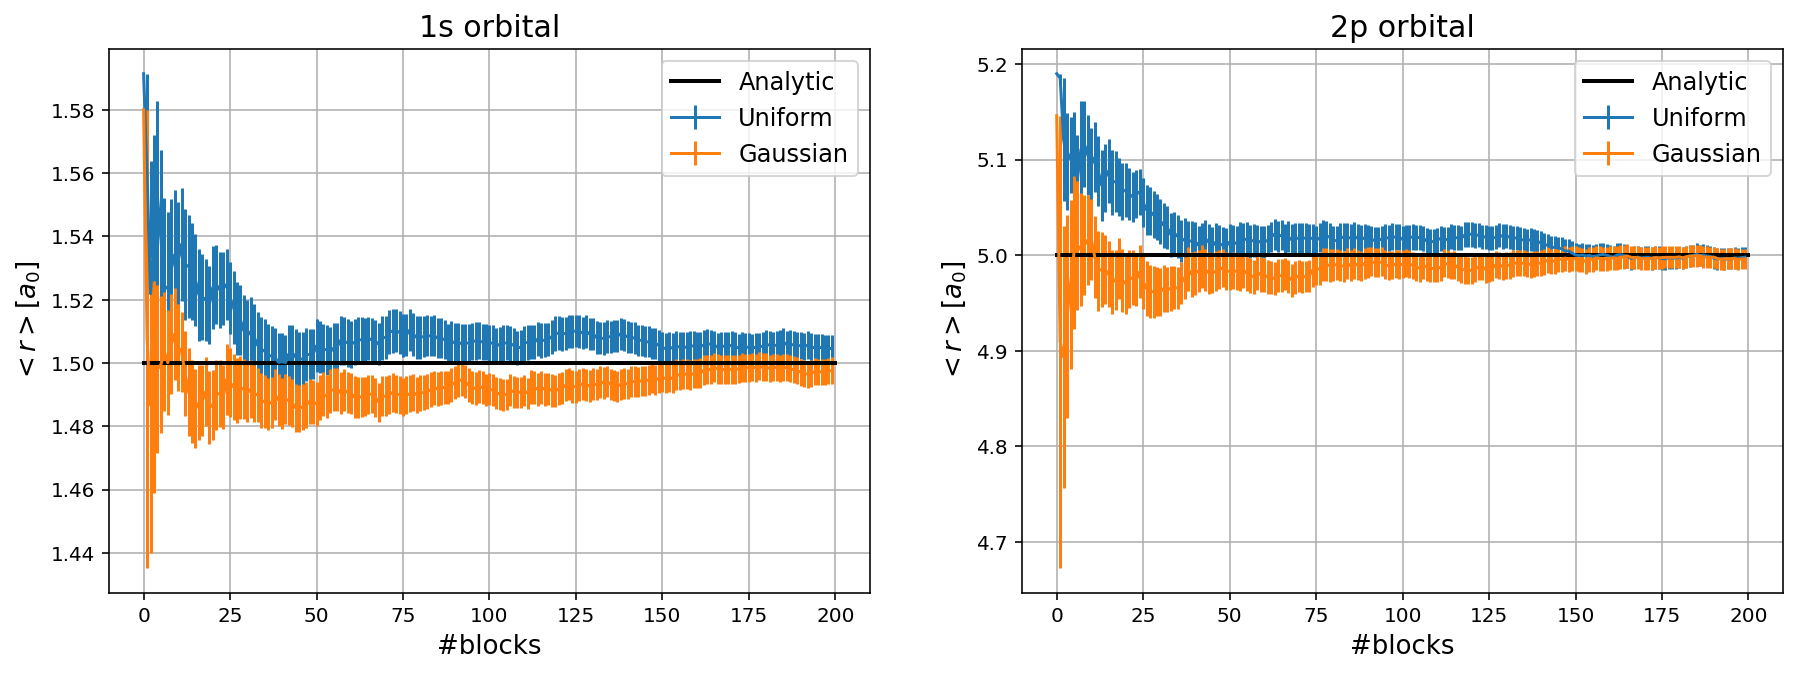

In [4]:
x, U1, errU1 = np.loadtxt("Results/Mean_Uni_1s.out", usecols=(0,1,2), delimiter=', ', unpack=True)
G1, errG1 = np.loadtxt("Results/Mean_Gaus_1s.out", usecols=(1,2), delimiter=', ', unpack=True)

U2, errU2 = np.loadtxt("Results/Mean_Uni_2p.out", usecols=(1,2), delimiter=', ', unpack=True)
G2, errG2 = np.loadtxt("Results/Mean_Gaus_2p.out", usecols=(1,2), delimiter=', ', unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].errorbar(x,U1,xerr=None,yerr=errU1, label='Uniform')
axs[0].errorbar(x,G1,xerr=None,yerr=errG1, label='Gaussian')
axs[0].plot([0,200],[1.5,1.5], label='Analytic', color='black', linewidth=2)
axs[0].set_title('1s orbital', fontsize=15)
axs[0].set_ylabel('$<r> [a_0]$',fontsize=13)
axs[0].legend(fontsize='large')


axs[1].errorbar(x,U2,xerr=None,yerr=errU2, label='Uniform')
axs[1].errorbar(x,G2,xerr=None,yerr=errG2, label='Gaussian')
axs[1].plot([0,200],[5,5], label='Analytic', color='black', linewidth=2)
axs[1].set_title('2p orbital', fontsize=15)
axs[1].set_ylabel('$<r>[a_0] $',fontsize=13)
axs[1].legend(fontsize='large')

for ax in axs.flat:
    ax.set_xlabel('#blocks', fontsize=13)
    ax.grid(True)


plt.show()

Si nota che con entrambe le distribuzioni e per entrambe le funzioni d'onda la media a blocchi converge entro una deviazione standard dal valore analitico. Posso dunque affermare che entrambe le $T(x|y)$ sono adatte per campionare questa distribuzione di probabilità. 


Ho inoltre simulato lo stesso codice modificando però il punto di partenza: se lo *starting point* dell'Algoritmo di Metropolis è troppo lontano dalle zone in cui la distirbuzione di prboabilità ha i suoi picchi, allora questo faticherà a giungere verso i picchi in un breve tempo e di conseguenza eseguirà un campionamento peggiore del modulo quadro di $\Psi$. Di seguito riporto un grafico di $\langle r \rangle _{1,0,0}$ con punto iniziale $(x_0, y_0, z_0) = (2500, 1, 1)$

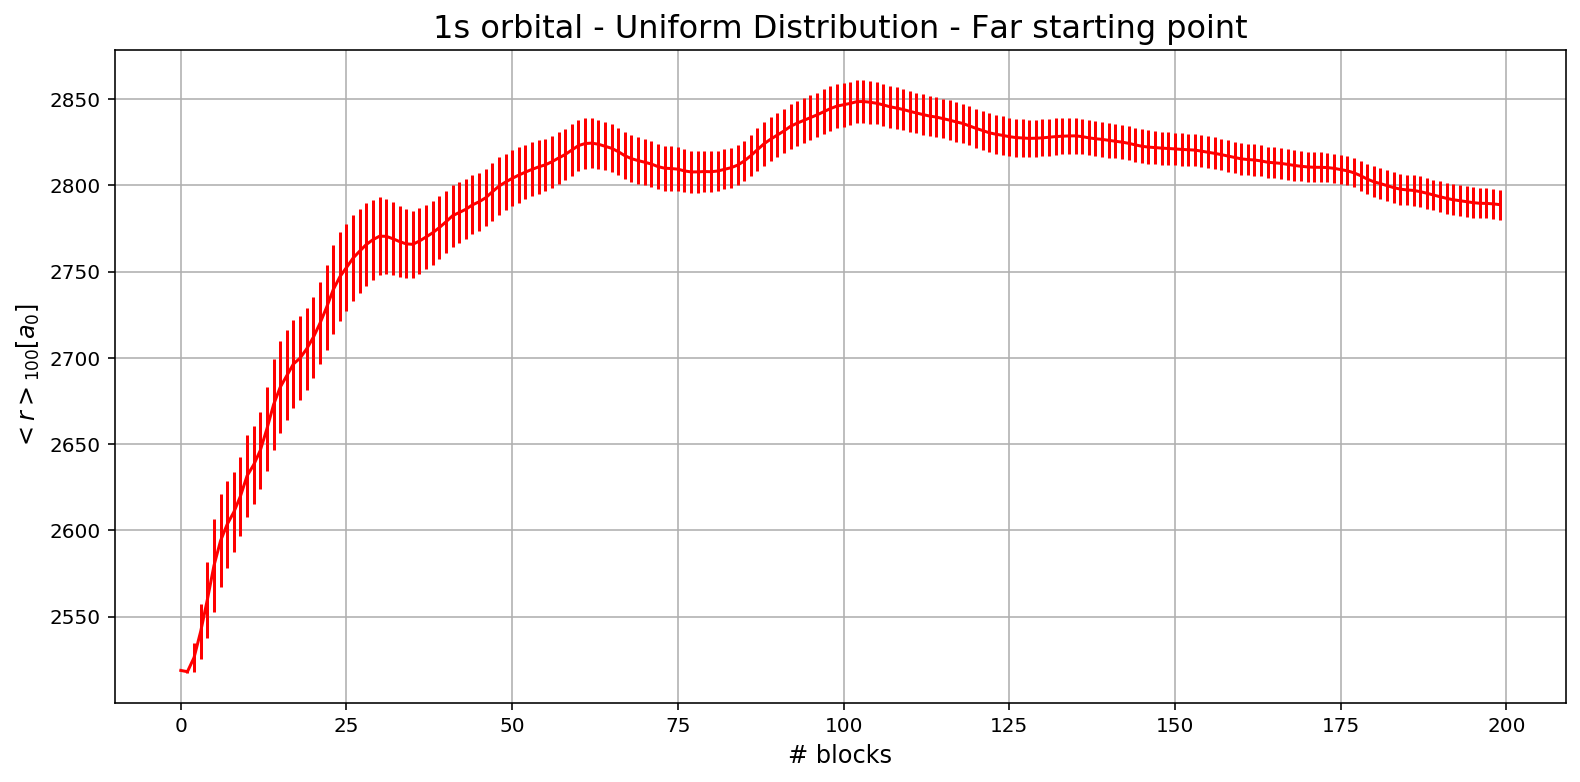

In [5]:
U1, errU1 = np.loadtxt("Results/FAR_Mean_Uni_1s.out", usecols=(1,2), delimiter=", ", unpack=True)

plt.figure(figsize=(13,6))
plt.errorbar(x,U1, xerr=None, yerr=errU1, color='red')
plt.title('1s orbital - Uniform Distribution - Far starting point', fontsize=16)
plt.grid()
plt.xlabel('# blocks',fontsize=12)
plt.ylabel('$<r>_{100} [a_0]$', fontsize=12)

plt.show()

Da ultimo, ho voluto plottare la distribuzione dei punti campionati nello spazio 3D. Si nota che la densità di punti nello spazio segue quella nota degli orbitali atomici nell'atomo di idrogeno. L'orbitale 1s ha superfici di equiprobabilità sferiche (infatti $l=0$ e l'hamiltoniana commuta con $L^2, L_z$), mentre nel caso dell'orbitale 2p si ha simmetria cilindrica per rotazioni attorno all'asse $z$. Si riportano solo i grafici nel caso di distribuzione uniforme perchè identici a quelli con estrazione gaussiana.

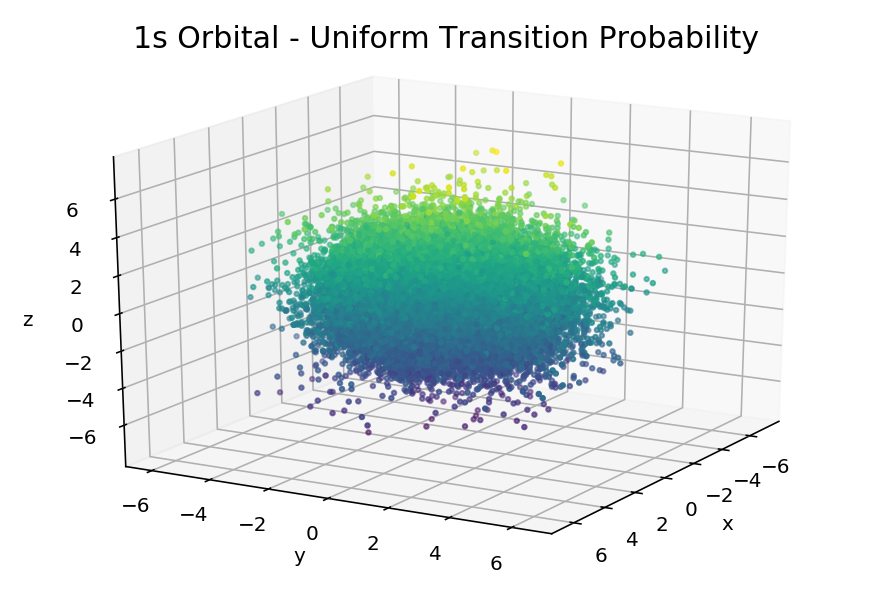

In [6]:
X,Y,Z = np.loadtxt("Results/Coords_Uni_1s.out", usecols=(0,1,2), delimiter=", ", unpack=True)


fig = plt.figure()

ax = Axes3D(fig)
ax.set_title("1s Orbital - Uniform Transition Probability", fontsize=15)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20,30)


plt.show()

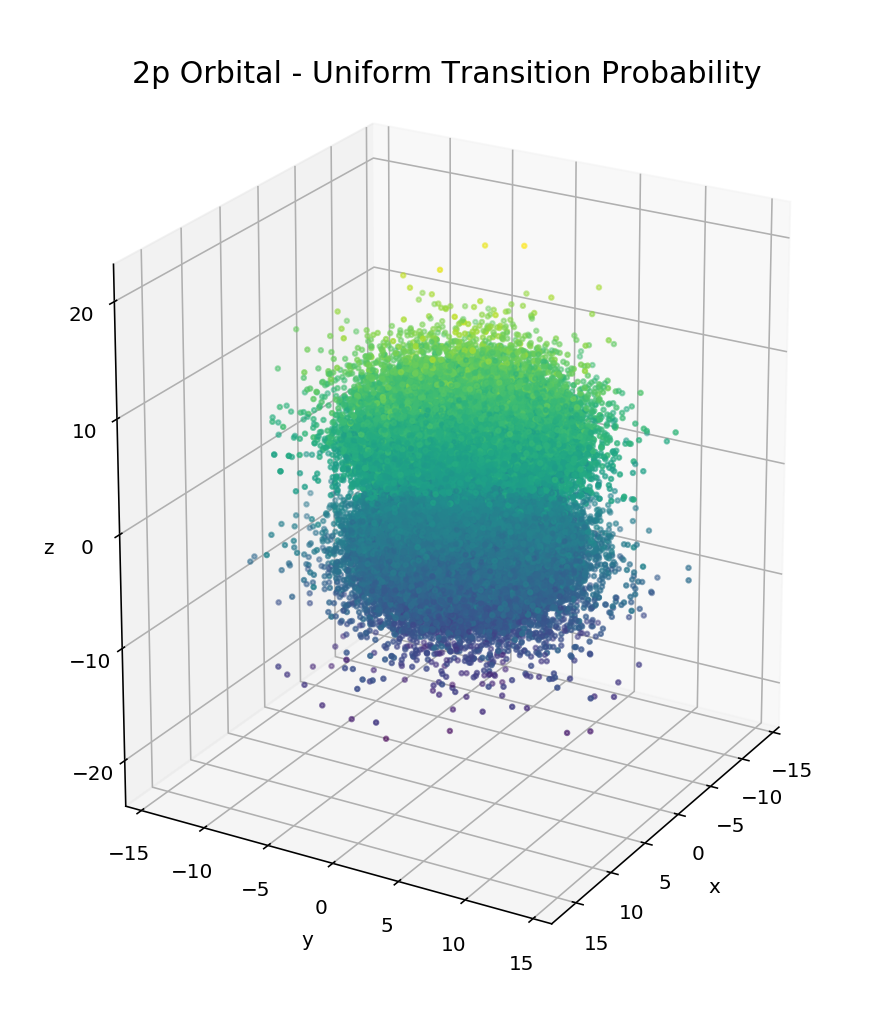

In [7]:
X,Y,Z = np.loadtxt("Results/Coords_Uni_2p.out", usecols=(0,1,2), delimiter=", ", unpack=True)


fig = plt.figure(figsize=(6,7))

ax = Axes3D(fig)
ax.set_title("2p Orbital - Uniform Transition Probability", fontsize=15)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(20,30)


plt.show()